# Boston Housing Data using Linear Models - Homework

This case study uses real housing data to build a model that can predict house prices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Load linear regression model
from sklearn.linear_model import LinearRegression

## Load the Data

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# Find out how many data rows and features we have
print(boston.data.shape)

(506, 13)


In [7]:
# Get Feature names
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Loading into Pandas

In [8]:
# Load into a PANDAS data frame
import pandas as pd 
df = pd.DataFrame(boston.data)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# Replace column headers
df.columns = ['crimRate','zoned','industry','riverside','nitOxide','avgRooms','houseAge','workDist','highways','tax','pupTeach',
 'racial', 'socStat']

In [11]:
df['price'] = boston.target

In [12]:
df.head()

,crimRate,zoned,industry,riverside,nitOxide,avgRooms,houseAge,workDist,highways,tax,pupTeach,racial,socStat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Analysis and Visualisation

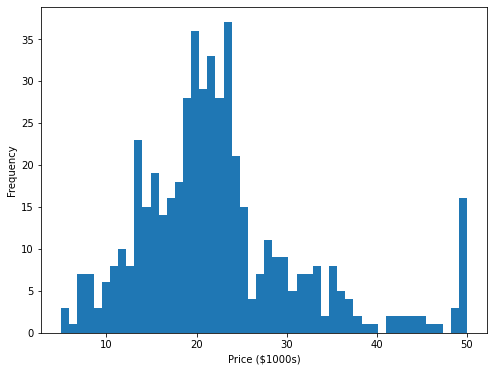

In [13]:
# Let us look at what we have to predict 
plt.figure(figsize=(8, 6))
plt.hist(df.price,bins=50);
plt.xlabel('Price ($1000s)')
plt.ylabel('Frequency');

In [14]:
# A number of properties have a price of 50.0 - we drop these as they seem to be outliers

df = df[df.price<49]

Text(0, 0.5, 'Frequency')

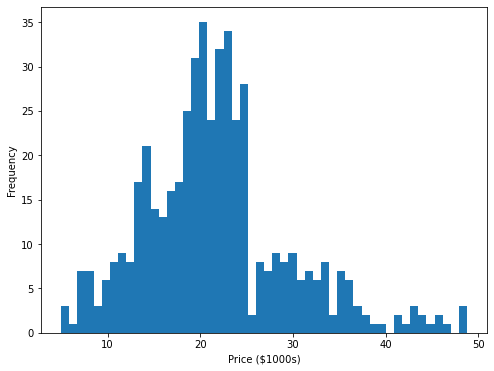

In [15]:
# Let us look at what we have to predict 
plt.figure(figsize=(8, 6))
plt.hist(df.price,bins=50);
plt.xlabel('Price ($1000s)')
plt.ylabel('Frequency')

In [16]:
# Get a description of the features
df.describe()

,crimRate,zoned,industry,riverside,nitOxide,avgRooms,houseAge,workDist,highways,tax,pupTeach,racial,socStat,price
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000
mean,3.643241,11.112245,11.113143,0.059184,0.554307,6.245471,68.27898,3.834519,9.514286,408.002041,18.520000,355.855449,12.92402,21.635918
std,8.722154,22.844626,6.821302,0.236209,0.116688,0.653147,28.16479,2.109948,8.691297,168.065190,2.110478,92.634273,7.08318,7.865301
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.90000,1.137000,1.000000,187.000000,12.600000,0.320000,1.98000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.881000,44.55000,2.111050,4.000000,280.250000,17.400000,375.912500,7.34750,16.700000
50%,0.247510,0.000000,9.690000,0.000000,0.538000,6.185000,76.80000,3.275900,5.000000,330.000000,19.100000,391.770000,11.67500,20.900000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.578000,93.87500,5.214600,24.000000,666.000000,20.200000,396.322500,17.11750,24.675000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,48.800000


In [17]:
prices = df['price']

In [18]:
def plotFeatureName(featureName):
    plt.figure(figsize=(8,6))
    plt.scatter(df[featureName], prices)  
    plt.title(featureName)
    plt.xlabel(featureName)
    plt.ylabel('price')

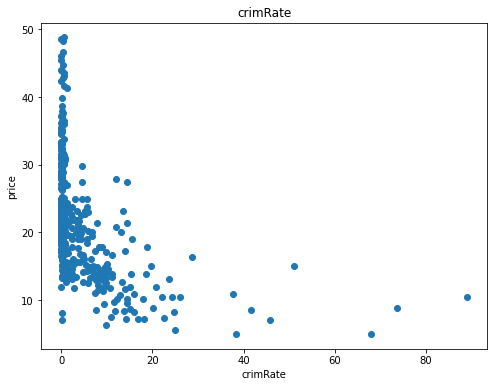

In [19]:
plotFeatureName('crimRate')

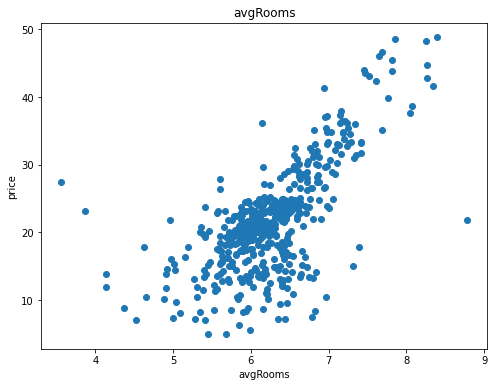

In [20]:
plotFeatureName('avgRooms')

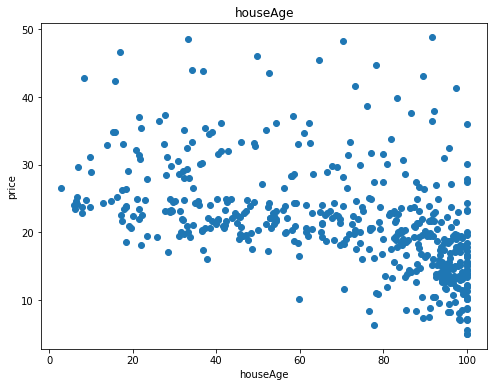

In [21]:
plotFeatureName('houseAge')

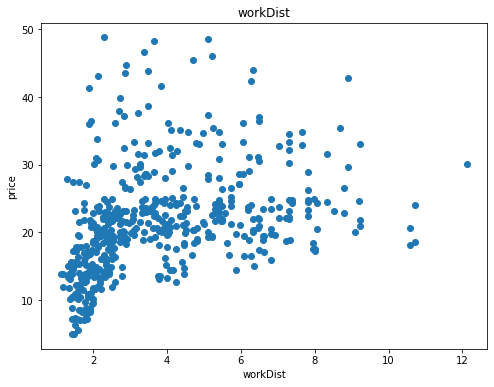

In [22]:
plotFeatureName('workDist')

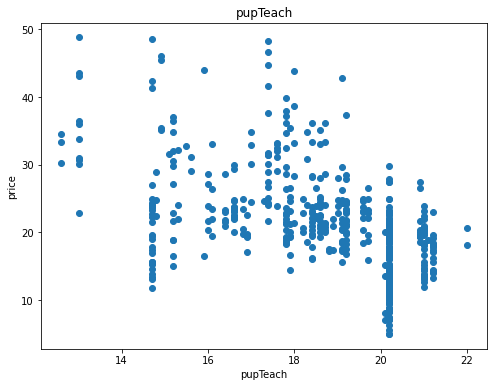

In [23]:
plotFeatureName('pupTeach')

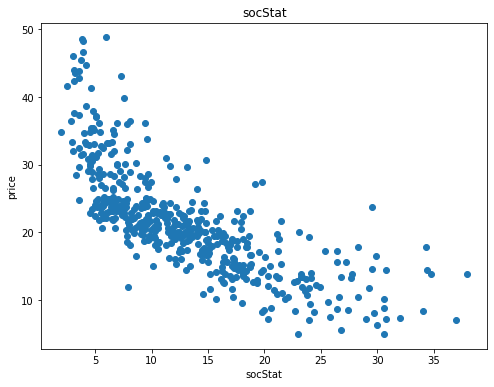

In [24]:
plotFeatureName('socStat')

We first drop these field

In [25]:
df_small = df

In [26]:
df_small = df_small.drop('highways',axis=1);
df_small = df_small.drop('zoned',axis=1);
df_small = df_small.drop('riverside',axis=1);
df_small = df_small.drop('racial',axis=1)

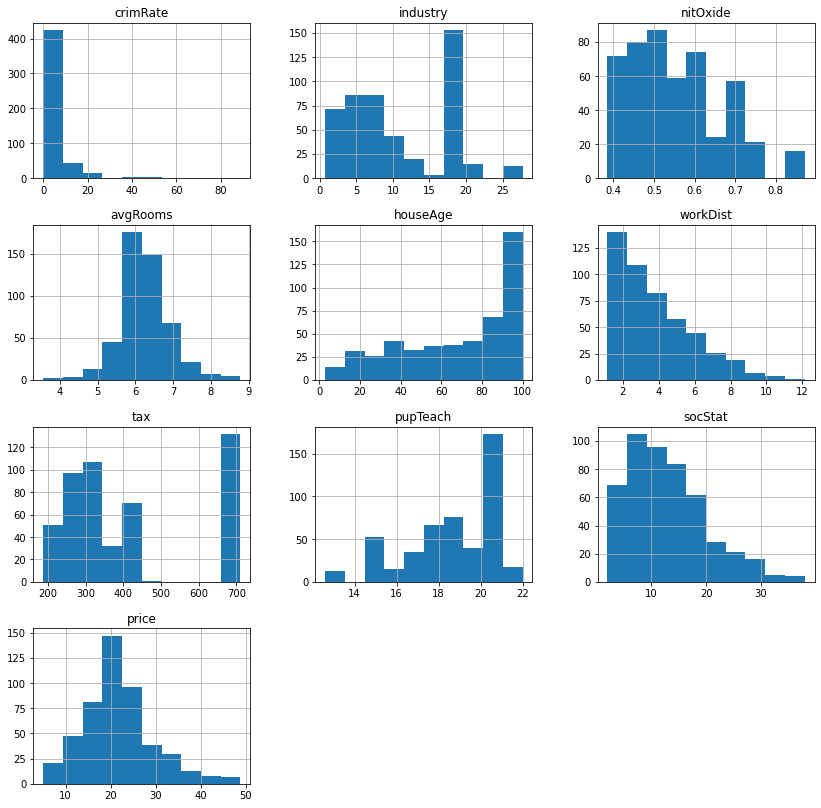

In [27]:
# Get histograms
df_small.hist(figsize=(14, 14));

In [28]:
# How does the correlation matrix look ?
df_small.corr(method='pearson')

,crimRate,industry,nitOxide,avgRooms,houseAge,workDist,tax,pupTeach,socStat,price
crimRate,1.000000,0.408053,0.420476,-0.219307,0.353751,-0.382231,0.583711,0.287079,0.461755,-0.450115
industry,0.408053,1.000000,0.765155,-0.412413,0.637970,-0.710284,0.717678,0.387656,0.636527,-0.600005
nitOxide,0.420476,0.765155,1.000000,-0.322609,0.727671,-0.768122,0.667380,0.188381,0.612444,-0.524451
avgRooms,-0.219307,-0.412413,-0.322609,1.000000,-0.268464,0.245789,-0.281955,-0.293299,-0.610369,0.686634
houseAge,0.353751,0.637970,0.727671,-0.268464,1.000000,-0.743043,0.499682,0.268459,0.637879,-0.492915
workDist,-0.382231,-0.710284,-0.768122,0.245789,-0.743043,1.000000,-0.532025,-0.246773,-0.536493,0.368813
tax,0.583711,0.717678,0.667380,-0.281955,0.499682,-0.532025,1.000000,0.452252,0.566467,-0.572442
pupTeach,0.287079,0.387656,0.188381,-0.293299,0.268459,-0.246773,0.452252,1.000000,0.358023,-0.518641
socStat,0.461755,0.636527,0.612444,-0.610369,0.637879,-0.536493,0.566467,0.358023,1.000000,-0.759837
price,-0.450115,-0.600005,-0.524451,0.686634,-0.492915,0.368813,-0.572442,-0.518641,-0.759837,1.000000


# Building a Small Model (Reduced Features)

In [29]:
# Let's start by looking at the data 
X = df_small

In [30]:
y = X['price']

In [31]:
# Can't have price as a feature !!!!!!!!!
X = X.drop('price',axis=1)

In [32]:
X.columns

Index(['crimRate', 'industry', 'nitOxide', 'avgRooms', 'houseAge', 'workDist',
       'tax', 'pupTeach', 'socStat'],
      dtype='object')

In [33]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state = 999)

In [34]:
# Fit to the training data
lm = LinearRegression()
lm.fit(X_train, y_train);

In [35]:
lm.intercept_
y_pred = lm.predict(X_test)

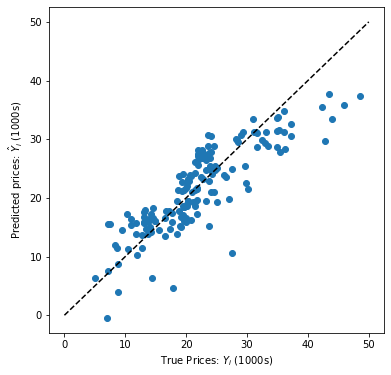

In [36]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("True Prices: $Y_i$ (1000s)")
plt.ylabel("Predicted prices: $\hat{Y}_i$ (1000s)")
plt.plot([0, 50], [0, 50], '--k');

In [37]:
# See how well it does on the test set
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

4.388631879498686
0.7248273646958804


# Big Model with All Data Fields

In [38]:
X = df
X = X.drop('price',axis=1)

In [39]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state = 999)

In [40]:
# Fit to the training data and predict on test set
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

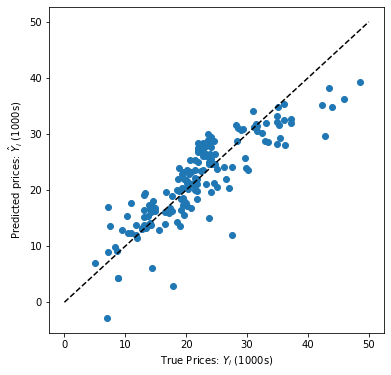

In [41]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("True Prices: $Y_i$ (1000s)")
plt.ylabel("Predicted prices: $\hat{Y}_i$ (1000s)")
plt.plot([0, 50], [0, 50], '--k');

### Better with more data. R2 goes from 0.724 to 0.740

## Factor importance

Scikit learn for some reason does not make it easy to get the p-values. I use statsmodels.

In [42]:
lm.intercept_

35.601800803222076

In [43]:
lm.coef_

array([-1.23901758e-01,  1.83111406e-02, -7.35776249e-02, -3.35068034e-01,
       -1.51370357e+01,  3.73242162e+00, -1.70434385e-02, -1.38386942e+00,
        2.54043560e-01, -1.22231753e-02, -9.41693829e-01,  9.49539556e-03,
       -3.68618034e-01])

In [44]:
import statsmodels.api as sm

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     91.50
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           2.11e-98
Time:                        21:00:52   Log-Likelihood:                -873.18
No. Observations:                 328   AIC:                             1774.
Df Residuals:                     314   BIC:                             1827.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.6018      4.917      7.240      0.0

C:\Users\domok\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The values agree with Scikit learn.